# Lesson1 手書き文字認識(ニューラルネットワーク入門)
## Section1 解説
### 1.1 Keras実装プロセス
KerasによるMLPの実装方法
題材：手書き数字画像を入力データ、対応する数字の値を出力データとする教師あり学習(分類)
#### 1.1.0 データの用意
MNISTの手書き数字データセットを用いる。データセットの中身は、
- x : 手書き数字画像(28×28)  
- y : 正解のラベル(xの画像が表す数字)

となっているが、これらは、
- (x_train, y_train) : モデルの学習用
- (y_test, y_test) : モデルの評価用

と区別される。

以下のようにkeras.datasetsからimportすることで使用できる。

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

MNISTの手書き数字のデータを表示する
⇒matplotlibを用いる

jupyter notebook上でmatplotlibの結果を表示するには、%matplotlib inlineを冒頭で宣言する必要がある。  

また、MNISTの画像には、それぞれに対して画像が示す数字が正解のラベルとして与えられている。

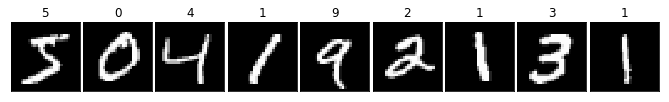

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

# 各MNIST画像の上に（タイトルとして）対応するラベルを表示
for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')

MNISTの各画像が0～9のどの数字であるか分類したい(10クラス問題という)
(**クラス**＝分類先のこと)

注意点：分類タスクを行う際、出力データはラベルだが、ラベルは数字としての大小に意味を持たない

**名義尺度**＝分類にのみ意味があり順序には意味がない尺度

機械学習のアルゴリズムでは数字の大小に意味があるものと扱うので、名義尺度(ラベル)を上手く変換しなけれならない

⇒**one-hot表現**

全体で3クラスある時の各クラスをone-hot表現で表すと、
- 1:[1, 0, 0]
- 2:[0, 1, 0]
- 3:[0, 0, 1]

となる。
keras.utils.to_categorical関数によってこの変換を行うことが出来る。


In [4]:
from keras.utils import to_categorical

# 入力画像を行列(28x28)からベクトル(長さ784)に変換
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# 名義尺度の値をone-hot表現へ変換
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### 1.1.1 モデル構築
学習に使用するMLPのモデルを構築する。(どんなlayerをどこに配置するか、各layerのユニット数はいくつか、を指定する)

モデルを構築するための「容器」となるのがkeras.models.Sequentialクラス

この「容器」の中に、Sequential.add関数を用いて、keras.layersに定義されているlayerクラスを積み重ねることでモデルの構築を行う。

layerをSequentialクラスに積み終えたら、Sequential.compile関数でモデルの学習処理を指定する。(モデル構築完了)

compile関数で指定するのは、
- optimizer(最適化手法)
- loss(損失関数)  
- metrics(評価関数(任意)) 


In [5]:

from keras.models import Sequential
from keras.layers import Dense, Activation

# モデルの「容器」を作成
model = Sequential()

# 「容器」へ各layer（Dense, Activation）を積み重ねていく（追加した順に配置されるので注意）
# 最初のlayerはinput_shapeを指定して、入力するデータの次元を与える必要がある
model.add(Dense(units=256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

# モデルの学習方法について指定しておく
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### 1.1.2 モデルの学習
1.2.1で構築したモデルで実際に学習を行うには、Sequential.fit関数を用いる。
Sequential.fit関数は固定長のバッチで学習を行う。

主な引数

* x : 学習に使用する入力データ
* y : 学習に使用する出力データ
* batch_size : 学習中のパラメータ更新を1回行うにあたって用いるサンプル数(ミニバッチサイズ)
* epochs : 学習のエポック数
* verbose : 学習のログを出力するか(0:しない、1:バーで出力、2:エポックごとに出力)
* validation_split/validation_data : 検証用に用いるデータの割合(0～1)、あるいは検証用データそのもの
* shuffle : 各エポックごとにデータをシャッフルするか
* callbacks : 訓練中のモデルの挙動を監視できるcallback関数を指定できる


In [6]:
model.fit(x_train, y_train,
          batch_size=1000, epochs=10, verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 8.6994 - acc: 0.4528 - val_loss: 7.1136 - val_acc: 0.5542
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 6.6089 - acc: 0.5837 - val_loss: 5.5081 - val_acc: 0.6532
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 4.6110 - acc: 0.7067 - val_loss: 3.9514 - val_acc: 0.7484
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 3.8222 - acc: 0.7567 - val_loss: 3.7163 - val_acc: 0.7607
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 2.3706 - acc: 0.8401 - val_loss: 1.0729 - val_acc: 0.9214
Epoch 6/10
60000/60000 [==============================] - 6s 104us/step - loss: 1.0167 - acc: 0.9254 - val_loss: 1.0249 - val_acc: 0.9219
Epoch 7/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.7997 - acc: 0.9406 - val_loss: 0.7235 - val

モデルの評価を行うにはSequential.evaluate関数を用いる。Sequential.evaluate関数は、固定長のバッチごとに、損失関数値または評価関数値を出力する。

主な引数

* x : 評価に使用する入力データ
* y : 評価に使用する出力データ
* batch_size : 1回の評価を行うにあたって用いるサンプル数
* verbose : 評価のログを出力するか(0:しない、1:する(デフォルト))


In [7]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 142us/step
Test loss: 0.6443389012626197
Test accuracy: 0.9472


#### 1.1.3 モデルによる予測
Sequential.predict関数により1.2.2で学習させたモデルを用いて予測を行う。

主な引数

* x : 予測に使用する入力データ
* batch_size : まとめて1度に予測を行うサンプル数
* verbose : 前と同じ(略)


In [8]:
classes = model.predict(x_test, batch_size=128)

#### モデルの可視化
1.1.1で作成したモデルは以下のようにグラフで表現することが出来る。

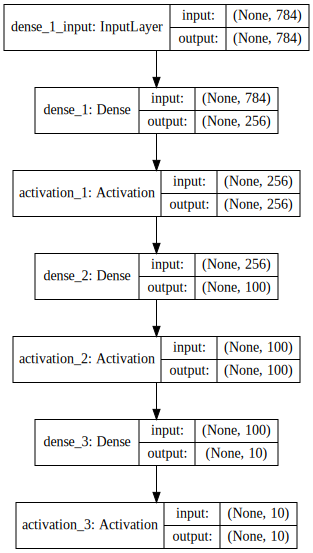

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 1.2 各モデルLayer
Layerクラスについて詳しく見ていく。

Layerクラスとは、MLPで中心的な存在である層を表すクラス。

Layerには様々な種類があり、それぞれが独自の機能を持っている。

#### 1.2.1 Dense
Denseレイヤーは一般的な全結合層を表すLayer。入力 $u\in \mathbb{R}^D$ に対して、
$$
v=\sigma (Wu+b)\in \mathbb{R}^{D^\prime}\
$$
を出力する。（$W\in \mathbb{R}^{D^\prime\times D}$:重み行列、$b\in \mathbb{R}^{D^\prime}$:バイアス) (重み行列とバイアスは学習によって値が決まる)

$\sigma(x):\mathbb{R}^{D^\prime}→\mathbb{R}^{D^\prime}$ : 活性化関数は任意に指定することが出来る。
(実際には、最後の出力層の活性化関数に関しては、問題の特性から決まることが多い)

一般に、活性化関数には非線形関数を指定することで、MLPの性能を向上させている。

主な引数
- units: 出力ユニット数($N$)
- activation : 出力ユニットに適する活性化関数(Activationレイヤーの説明箇所を参照)
- use_bias : バイアス$b$を使用するか
- kernel_initializer : 重み行列$W$の初期化方法(initializerに関しては後述)
- bias_initializer : バイアス$b$の初期化方法(initializerに関しては後述)

また、shapeの入出力での変化は

(batch_size, ..., input_dim) → (batch_size, ..., units)

と、一番深いネストの次元がinput_dimからunitsに変わるだけ。

```python
keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                        kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
                        kernel_constraint=None, bias_constraint=None)                        
```
1.1.1のモデルの構築で出てきた例を以下に再掲

```python
from keras.layers import Dense, Activation

model.add(Dense(units=256, input_shape=(784,))) # 次元の変化: 784 -> 256
model.add(Activation('relu'))
model.add(Dense(units=100)) # 次元の変化: 256 -> 100
model.add(Activation('relu'))
model.add(Dense(units=10)) # 次元の変化: 100 -> 10
model.add(Activation('softmax'))
```

#### 1.2.2 Activation
Activationレイヤーは入力に対して活性化関数を適用したものを出力する。(入力と出力でshapeは変わらない)

引数(1つだけ)
- activation : 適用する活性化関数

```python
keras.layers.core.Activation(activation)
```
[活性化関数として使用できる関数の一覧] : https://keras.io/ja/activations/

活性化関数としてよく用いられる関数
- sigmoid : $f(x)=\frac{1}{1+e^{-x}}$
- ReLU : $f(x)=\max(0, x)$
- tanh : $f(x)=\tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$
- softmax : $f(x)=\frac{\exp(x_d)}{\Sigma_{d^\prime}}  (x\in\mathbb{R}^{D^\prime}, d=1, 2, ..., D)$

特にsoftmax関数は出力が規格化されているので、確率として解釈できるためたクラス分類タスクの出力層に使用されることが多い。(2クラス分類ではsigmoid関数を出力層に使用することも多い。)

ここで、活性化関数を以下でプロットしてみる。(多変数関数のsoftmaxを除く)


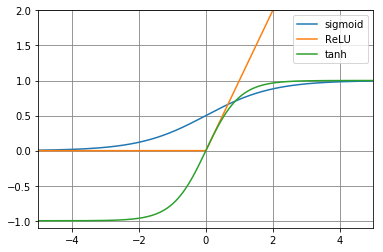

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

fig = plt.figure()
x = np.linspace(-10, 10, 1000)

ax = fig.add_subplot(111)
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, relu(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')

plt.legend()
plt.xlim(-5, 5)
plt.ylim(-1.1, 2)
plt.grid(which='major',color='gray',linestyle='-')
plt.show()

1.1.1のモデルの構築で出てきた例を以下に再掲

```python
from keras.layers import Dense, Activation

model.add(Dense(units=256, input_shape=(784,))) # 次元の変化: 784 -> 256
model.add(Activation('relu'))
model.add(Dense(units=100)) # 次元の変化: 256 -> 100
model.add(Activation('relu'))
model.add(Dense(units=10)) # 次元の変化: 100 -> 10
model.add(Activation('softmax'))
```

なお、活性化関数はDenseレイヤーなどで直接指定することも可能で以下のコードは上記と同じ結果となる。

```python
from keras.layers import Dense, Activation

model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
```
#### 1.2.3 Flatten
Flattenレイヤーは入力をフラット化する。

つまり、リストの入れ子になっているデータを1つのリストに展開する。

(例：[[1, 2, 3], [4, 5, 6], [7], [8, 9]] → [1, 2, 3, 4, 5, 6, 7, 8, 9])

```python
keras.layers.core.Flatten()
```
例えば以下のように用いる。(出力shapeはbatch_sizeを除く入力shapeの積)

```python
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(3, 32, 32))) # 次元の変化: (3, 32, 32) -> (64, 32, 32)
# Conv2Dは未修ですが、ここではその機能は関係ないので気にしなくて結構です

model.add(Flatten()) # 次元の変化: (64, 32, 32) -> (65536,) (65536 = 64*32*32)
```

#### 1.2.4 Reshape
Reshapeレイヤーは入力を指定のshapeに変換して出力する。

引数
- target_shape : 変換先のshapeを表す整数のタプル(サンプルの次元(バッチサイズ)は含まない)

```python
keras.layers.core.Reshape(target_shape)
```

使用例
```python
model = Sequential()
model.add(Reshape((3, 4), input_shape=(12,))) # 次元の変化: (12,) -> (3, 4)

model.add(Reshape((6, 2))) # 次元の変化: (3, 4) -> (6, 2)

# `-1`を指定すると、その次元については推定してくれます(6/2=3)
model.add(Reshape((-1, 2, 2))) # 次元の変化: (6, 2) -> (?, 2, 2)=(3, 2, 2)
```

#### 1.2.5 Permute
Permuteレイヤーは入力の次元を入れ替える。

引数
- dims : 次元の入れ替え方を指定する整数のタプル(サンプルの次元は含まないので1から始まるindexで指定する)(入力と出力でshapeは変わらない)

```python
keras.layers.core.Permute(dims)
```

使用例
```python
model = Sequential()
model.add(Permute((2, 1), input_shape=(10, 64))) # 次元の変化: (10, 64) -> (64, 10)
```

#### 1.2.6 RepeatVector
RepeatVectorレイヤーは入力を指定回数繰り返す。

引数
- n : 入力の複製回数

shapeの入出力の変化は、

(num_samples, features) → (num_samples, n ,features)

で、入力には２階のテンソルのみ受け付ける。

### 1.3 損失関数
モデルの学習をする際には、損失関数の最小化を行う。

kerasではモデルをコンパイルする際に損失関数の設定を行う。

損失関数の選択には、出力値が 連続な場合 OR 離散な場合の２つに分類され、それにより大きく異なる。

**出力値が連続の場合**

⇒**平均二乗誤差**が主に使われる。平均二乗誤差は以下の様に表される。
$$
E=-\frac{1}{N}\Sigma_{n=1}^N(y_n-t_n)^2
$$
( N : 各ミニバッチのデータ数、 $y_n, x_n$はそれぞれ入力$x_n$に対するモデルの出力値(y_pred)、出力データ(y_true))

平均二乗誤差を使用する場合、compile関数の引数にloss='mean_squared_error'を指定する。

**出力値が離散の場合**

⇒**(他クラス)交差エントロピー**が主に使われる。２クラス分類の場合の交差エントロピーは以下。
$$
E=-\frac{1}{N}\Sigma_{n=1}^N[t_n\ln{y_n}+(1-t_n)\ln{(1-y_n)}]
$$

他クラス分類(Kクラス)の場合の交差エントロピーは以下。
$$
E=-\frac{1}{N}\Sigma_{n=1}^N\Sigma_{k=1}^Kt_n\ln{y_{nk}}
$$

それぞれ、compile関数の引数にloss='binary_crossentropy'、loss='categorical_crossentropy'を指定する。

今回利用したMNISTは0~9の離散値であるから、以下の様な他クラス交差エントロピーを利用した。
```python
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
```

### 1.4 評価関数
評価関数(metric)はモデルの良し悪しを評価する。

損失関数もモデルの良し悪しの指標になるという点に関して言えば同じだが、

損失関数は最適化計算を通して学習に直接的に影響するのに対し、

評価関数は学習には使用されず、あくまでその時点でのモデルの評価指標を出力するのみである。

評価関数としては**accuracy(正解率)**が多く使用される。(正解率＝全体のデータに対して予測値が答えと一致した割合)

評価関数はcompile関数の引数として、metrics=['acc']等として指定する。

### 1.5 Functional API
上記で説明してきたのは、keras.models.Sequentialクラスを用いたモデル構築。

Sequentialクラスを用いる場合は、add関数を用いて簡単なモデル構築が可能だが、途中に分岐や合流があるような複雑なモデルは作成できない。

⇒**Functional API**を用いる。Functional APIは、
- **inputレイヤー**から構築を始める
- 各レイヤーの返り値(テンソル)を次のレイヤーの入力として順々に構築していく。
- **keras.models.Modelクラス**に入力と出力を指定することでインスタンス化する。

一度Modelクラスのインスタンスを作ってしまえば、後の学習などは、Sequentialクラスの場合と同様の手順。
